`Visualizing the History of Nobel Prize Winners`

`July 2025`

This project analyzes the Nobel Prize dataset (1901–2023) to uncover trends in gender, birth country, and prize categories. Using Python, we answer key questions about laureate demographics and highlight notable patterns in Nobel history.

`Any questions, please reach out!`

Chiawei Wang, PhD\
Data & Product Analyst\
<chiawei.w@outlook.com>

`*` Note that the table of contents and other links may not work directly on GitHub.

[Table of contents](#table-of-contents)
1. [Executive summary](#executive-summary)
   - [Challenge](#challenge)
   - [Research questions](#research-questions)
   - [Data overview](#data-overview)
   - [Approach](#approach)
   - [Results](#results)
   - [Conclusion](#conclusion)
2. [Exploratory data analysis](#exploratory-data-analysis)

# Executive summary

## Challenge

The Nobel Prize is a set of prestigious international awards given annually in several categories including Physics, Chemistry, Medicine, Literature, Peace, and Economic Sciences. Established by the will of Alfred Nobel in 1895, the prizes have been awarded since 1901 to individuals and organizations that have made significant contributions to humanity in these fields. The Nobel Prizes are widely regarded as the highest honors one can achieve in their respective disciplines.

## Research questions

1. What is the most commonly awarded gender and birth country?
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4. Who was the first woman to receive a Nobel Prize, and in what category?
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

## Data overview

The dataset contains information about Nobel Prize winners from 1901 to 2023:

| Index | Column                 | Type   | Description                                |
| ----- | ---------------------- | ------ | ------------------------------------------ |
| 0     | `year`                 | int64  | Year Nobel Prize was awarded               |
| 1     | `category`             | object | Prize category                             |
| 2     | `prize`                | object | Full prize name                            |
| 3     | `motivation`           | object | Reason for award                           |
| 4     | `prize_share`          | int64  | Fraction of prize shared                   |
| 5     | `laureate_id`          | object | Unique laureate identifier                 |
| 6     | `laureate_type`        | object | Type of laureate (individual/organization) |
| 7     | `full_name`            | object | Laureate's full name                       |
| 8     | `birth_date`           | object | Date of birth                              |
| 9     | `birth_city`           | object | City of birth                              |
| 10    | `birth_country`        | object | Country of birth                           |
| 11    | `sex`                  | object | Gender                                     |
| 12    | `organization_name`    | object | Affiliated organization                    |
| 13    | `organization_city`    | object | Organization city                          |
| 14    | `organization_country` | object | Organization country                       |
| 15    | `death_date`           | object | Date of death                              |
| 16    | `death_city`           | object | City of death                              |
| 17    | `death_country`        | object | Country of death                           |

## Approach

1. Load the dataset and find the most common gender and birth country
2. Identify the decade with the highest ratio of US-born winners
3. Find the decade and category with the highest proportion of female laureates
4. Find first woman to win a Nobel Prize
5. Determine repeat winners

## Results

- The gender with the most Nobel laureates is: Male
- The most common birth country of Nobel laureates is: United States of America
- The decade with the highest proportion of female laureates is: 2020
- The category with the highest proportion of female laureates is: Literature
- The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics
- The repeat winners are: Comité international de la Croix Rouge (International Committee of the Red Cross), Linus Carl Pauling, John Bardeen, Frederick Sanger, Marie Curie (née Sklodowska), Office of the United Nations High Commissioner for Refugees (UNHCR)

## Conclusion

The analysis of Nobel Prize winners has revealed significant insights into the demographics and trends within this prestigious award. Key findings include the predominance of male laureates, with the United States being the most common birth country. The 2020s have seen a notable increase in female laureates, particularly in the Literature category. Additionally, Marie Curie stands out as the first woman to receive a Nobel Prize, paving the way for future generations. Finally, several individuals and organizations have achieved the remarkable feat of winning multiple Nobel Prizes, highlighting their enduring contributions to humanity.

# Exploratory data analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Read in the CSV as a DataFrame
df = pd.read_csv('nobel.csv')

# Preview the data
print(df.shape)
df.head()

(1000, 18)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [2]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]
print('The gender with the most Nobel laureates is:', top_gender)
print('The most common birth country of Nobel laureates is:', top_country)

The gender with the most Nobel laureates is: Male
The most common birth country of Nobel laureates is: United States of America


In [3]:
# Calculate the proportion of USA born winners per decade
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
prop_usa_winners = df.groupby('decade', as_index = False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print('The decade with the highest proportion of US-born Nobel laureates is:', max_decade_usa)

The decade with the highest proportion of US-born Nobel laureates is: 2000


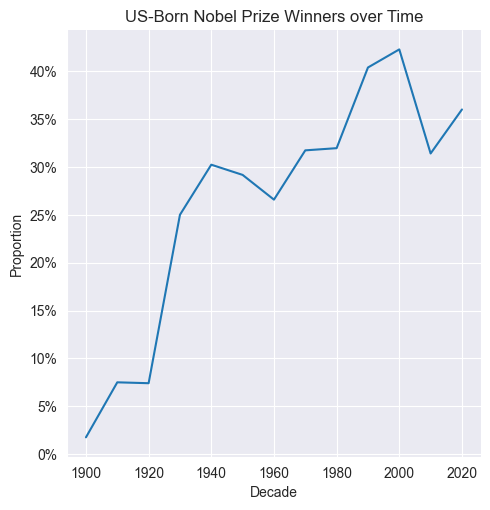

In [ ]:
# Plotting USA born winners over time
# Set Seaborn style
sns.set_style('darkgrid')

# Plotting the line plot (single line, one colour)
g = sns.relplot(x = 'decade', y = 'usa_born_winner', data = prop_usa_winners, kind = 'line')

# Set the title and axis labels
g.ax.set_title('US-Born Nobel Prize Winners over Time')
g.set_axis_labels('Decade', 'Proportion')

# Format y-axis as percentages
g.ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))

# Display the plot
plt.show()

In [5]:
# Calculating the proportion of female laureates per decade
df['female_winner'] = df['sex'] == 'Female'
prop_female_winners = df.groupby(['decade', 'category'], as_index = False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
print('The decade with the highest proportion of female laureates is:', max_female_decade_category['decade'].values[0])
print('The category with the highest proportion of female laureates is:', max_female_decade_category['category'].values[0])

The decade with the highest proportion of female laureates is: 2020
The category with the highest proportion of female laureates is: Literature


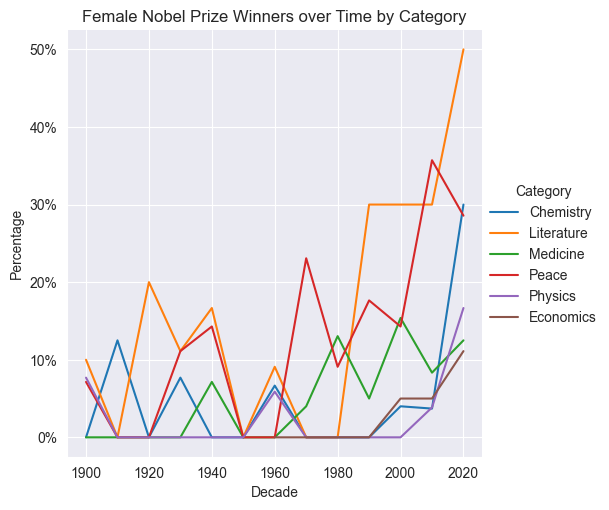

In [6]:
# Plotting female winners with % winners on the y-axis

# Set Seaborn style
sns.set_style('darkgrid')

# Plotting the line plot with multiple categories
g = sns.relplot(x = 'decade', y = 'female_winner', hue = 'category', data = prop_female_winners, kind = 'line')

# Set the title and axis labels
g.ax.set_title('Female Nobel Prize Winners over Time by Category')
g.set_axis_labels('Decade', 'Percentage')

# Format y-axis as percentages
g.ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change legend title to 'Category'
g.legend.set_title('Category')

# Display the plot
plt.show()

In [7]:
# Finding the first woman to win a Nobel Prize
nobel_women = df[df['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f'The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.')

The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [8]:
# Selecting the laureates that have received 2 or more prizes
counts = df['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print('The repeat winners are:', ', '.join(repeat_list))

The repeat winners are: Comité international de la Croix Rouge (International Committee of the Red Cross), Linus Carl Pauling, John Bardeen, Frederick Sanger, Marie Curie, née Sklodowska, Office of the United Nations High Commissioner for Refugees (UNHCR)
